In [4]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from collections import Counter

df = pd.read_csv('/home/munindra/Major_proj/datasets/Archive/B-cell3.csv',delimiter=',') #path to csv file

#df = df.rename(columns={4026: 'class'})

df.head()

,GENE1835X,GENE1836X,GENE1865X,GENE1380X,GENE1933X,GENE1932X,GENE1931X,GENE1930X,GENE3129X,GENE3126X,...,GENE3931X,GENE2588X,GENE3120X,GENE6X,GENE5X,GENE3X,GENE2X,GENE48X,GENE47X,class
0,0.46,0.70,0.67,-0.23,0.00,0.09,-0.02,-0.57,-0.17,-0.25,...,0.40,0.02,0.79000,0.64,0.16,1.22,1.37,-0.04,0.16,DLBCL
1,0.02,0.59,0.45,0.55,-0.08,-0.15,-0.05,-0.38,-0.55,0.35,...,0.57,0.52,-0.23000,0.30,0.09,-0.20,-0.05,-0.14,-1.15,DLBCL
2,-0.32,-0.63,-0.46,-0.28,-0.96,-1.17,-1.13,-0.89,-0.49,-0.23,...,1.62,-0.01,0.01475,0.29,-0.57,1.20,1.40,0.29,0.25,DLBCL
3,-0.51,-0.45,-0.16,-0.51,-0.58,-0.71,-0.65,-0.82,-0.30,-0.22,...,0.34,0.02,0.08000,0.49,0.29,1.26,1.24,0.05,0.70,DLBCL
4,0.20,0.13,0.20,0.09,-0.56,0.00,0.06,-0.15,-0.61,-0.65,...,0.16,0.66,1.11000,0.28,0.12,-0.16,-0.72,-0.04,-0.22,DLBCL


In [3]:
uni = Counter(df['class'])
print(uni)

Counter({'ACL': 23, 'GCL': 22, 'CLL': 11, 'ABB': 10, 'FL': 9, 'TCL': 6, 'RAT': 6, 'RBB': 4, 'GCB': 2, 'NIL': 2, 'DLBCL': 1})


In [250]:
#df = df.replace({"'prostate carcinoma cell line'": 0, "'brain glioblastoma cell line'": 1, "'breast carcinoma bulk'": 2, "'pancreas adenocarcinoma cell line'": 3, "'breast  bulk'": 4, "'colon adenocarcinoma cell line'": 5, "'brain  bulk'": 6, "'brain glioblastoma bulk'": 7, "'ovary carcinoma cell line'": 8, "'brain astrocytoma bulk'": 9, "'breast carcinoma cell line'": 10, "'ovary adenocarcinoma bulk'": 11, "'kidney  cell line'": 12, "'colon adenocarcinoma bulk'": 13, "'brain ependymoma bulk'": 14, "'brain medulloblastoma cell line'": 15, "'prostate carcinoma bulk'": 16, "'lymph node carcinoma bulk'": 17, "'vessel  cell line'": 18, "'colon  bulk'": 19, "'ovary  cell line'": 20, "'pancreas neoplasia bulk'": 21, "'pancreas  cell line'": 22, "'stomach adenocarcinoma bulk'": 23, "'prostate  bulk'": 24, "'kidney  bulk'": 25, "'stomach  bulk'": 26, "'peritoneum  bulk'": 27, "'cerebellum medulloblastoma bulk'": 28, "'ovary adenoma cell line'": 29, "'brain  cell line'": 30, "'blood  bulk'": 31, "'cerebellum  bulk'": 32, "'thalamus  bulk'": 33, "'prostate adenocarcinoma bulk'": 34, "'skin mesothelioma bulk'": 35, "'brain oligodendrioglioma bulk'": 36, "'lung  bulk'": 37, "'liver  bulk'": 38, "'heart  bulk'": 39, "'prostate adenocarcinoma cell line'": 40, "'brain ependymoblastoma bulk'": 41, "'skin neoplasia cell line'": 42}) # change here for class label
df = df.replace({1: 0, 2: 1})
#df = df.replace({101: 0, 201: 1, 601: 2, 701: 3, 401: 4, 501: 5, 100: 6, 200: 7, -1: 8, 301: 9, 302: 10, 300: 11, 202: 12})

In [3]:
# separate label from file
label = df.as_matrix(columns=df.columns[40:])   # change column value here
label = label.ravel()

df = df.drop(['class'],axis = 1)
print(label)
df.head()

[2 0 1 ... 2 0 0]


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.63,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,0.31,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.93,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,1.18,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,-0.07,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40


In [4]:
# remove id column
#df = df.drop(['id'],axis = 1)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.63,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,0.31,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.93,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,1.18,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,-0.07,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40


In [5]:
#k means clustering
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

cost = np.zeros(10)
for i in range(2,10):
    start = time()
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df)
    labels = model.labels_
    cost[i] = model.inertia_
    print ("k:",i, " cost:", cost[i])
    end = time()
    print ("K means from sklearn took {:.4f} seconds(k = {:.4f})".format(end - start,i))


('k:', 2, ' cost:', 261003.233921808)
K means from sklearn took 0.9938 seconds(k = 2.0000)
('k:', 3, ' cost:', 227591.59903707515)
K means from sklearn took 0.2695 seconds(k = 3.0000)
('k:', 4, ' cost:', 217929.01098813073)
K means from sklearn took 0.4666 seconds(k = 4.0000)
('k:', 5, ' cost:', 211241.676336039)
K means from sklearn took 0.8363 seconds(k = 5.0000)
('k:', 6, ' cost:', 206809.16324196063)
K means from sklearn took 0.6220 seconds(k = 6.0000)
('k:', 7, ' cost:', 204062.56346868744)
K means from sklearn took 0.5835 seconds(k = 7.0000)
('k:', 8, ' cost:', 202238.23537562005)
K means from sklearn took 0.7780 seconds(k = 8.0000)
('k:', 9, ' cost:', 200756.30546574685)
K means from sklearn took 0.8222 seconds(k = 9.0000)


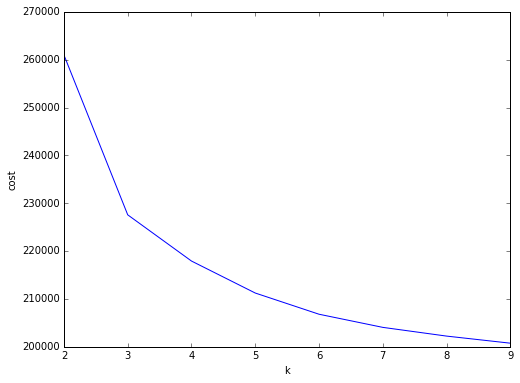

In [6]:
#plot elbow curve
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),cost[2:10])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [7]:
# k = 9 looks better value
best_k = 3 # change value of k here
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(df)
centr = kmeans.cluster_centers_
predicts = kmeans.predict(df)

In [8]:
print(centr)

[[-8.23943662e-03  1.00232394e-01  2.07147887e-01  3.02436620e-01
   4.64591549e-01  1.33354225e+00  2.22487324e+00  2.87009155e+00
   3.59690141e+00  4.36837324e+00  5.13051408e+00  4.35624648e+00
   3.52899296e+00  2.90394366e+00  2.13197183e+00  1.28851408e+00
   3.91457746e-01  2.72669014e-01  1.68387324e-01  6.33169014e-02
  -2.79929577e-02 -1.16338028e-02  2.70422535e-02 -1.60845070e-02
   2.29647887e-02 -2.23521127e-02  2.67535211e-02  2.29929577e-02
   2.87957746e-02 -1.43450704e-02  3.59154930e-03  2.40985915e-02
   5.80985915e-03  1.41971831e-02  5.35211268e-04  4.16901408e-03
  -2.30492958e-02  2.33239437e-02 -6.88661972e-02 -3.03521127e-03]
 [-4.38839779e-02  7.06337017e-01  1.41311602e+00  2.21817680e+00
   2.95567403e+00  3.81875138e+00  4.68743646e+00  4.13335912e+00
   3.54680110e+00  3.03835912e+00  2.55353039e+00  1.80228729e+00
   1.06120994e+00  1.05752486e+00  1.04510497e+00  7.61679558e-01
   4.79558011e-01  3.58364641e-01  2.48662983e-01  1.33038674e-01
  -1.6839

In [9]:
#print(predicts)
#print(label)

In [10]:
from collections import Counter

def max_ele(label,predicts,k):
    a = Counter(label) #label's count
    s = len(predicts)
    
    x = len(a)
    #print(x)
    ocr = []
    for i in range(x):
        temp = []
        for j in range(s):
            if label[j] == i:
                temp.append(predicts[j])
        ocr.append(temp)
            
    clus = []
    for i in range(x):
        y =  Counter(ocr[i])
        #print(y)
        clus_ocr = []
        for j in range(k):
            clus_ocr.append(y[j])
        
        clus.append(clus_ocr)
    #print(clus)
    
    maxi = []
    maxi_count =[]
    
    for j in range(k):
        ma = 0 
        for i in range(x):
            if (ma < clus[i][j]):
                idx = i
            ma = max(clus[i][j],ma)
        maxi.append(idx)
        maxi_count.append(ma)
    #print(maxi)
    return maxi,clus


maxi,clus = max_ele(label,predicts,best_k) # best k value ,here k = 9
print(maxi)
print(clus)

[1, 1, 2]
[[12, 880, 800], [723, 930, 0], [685, 0, 970]]


In [271]:

def metrics(maxi,label,clus,k):
    prec = []
    rec = []
    f1 = []
    ct = Counter(label)
    #print(ct)
    for j in range(k):
        x = (clus[maxi[j]][j])
        y = (sum([item[j] for item in clus]))
        z = float(x)/float(y)
        #print(z)
        prec.append(z)
        rc = (clus[maxi[j]][j])
        rec.append(float(rc)/ct[maxi[j]])
        f = (2*prec[j]*rec[j])/(prec[j]+rec[j])
        f1.append(f)

    print("precision : ",prec)
    print("recall are: ",rec)
    print("f1-score is: ",f1)
    return prec,rec,f1


precision,recall,f1_score = metrics(maxi,label,clus,best_k) # get metrics

f1_value = np.average(f1_score)

print("F1-Value of the clusters is: ",f1_value)


('precision : ', [0.5091549295774648, 0.5138121546961326, 0.5480225988700564])
('recall are: ', [0.43738656987295826, 0.5626134301270418, 0.5861027190332326])
('f1-score is: ', [0.4705499511877644, 0.537106555010107, 0.5664233576642336])
('F1-Value of the clusters is: ', 0.5246932879540349)


In [272]:

def purity_fn(df,clus,maxi,k):
    shape = df.shape
    r_len = shape[0]
    num = 0
    for i in range(k):
        num = num + float(clus[maxi[i]][i])
    purity = num/r_len
    return purity
#purity = []
#for i in range(2,10):
purity = purity_fn(df,clus,maxi,best_k)
print(purity)

0.5246
